<a href="https://colab.research.google.com/github/munieshwarevakattu/CMPE257-FALL23-MUNIESHWAR-EVAKATTU/blob/Homework-3/MAchineLearning_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def initial_weights(x ,y, hidden_layers):
    b1 = np.zeros(shape=(hidden_layers, 1))
    b2 = np.zeros(shape=(y, 1))
    W1 = np.random.randn(hidden_layers,x) * 0.01
    W2 = np.random.randn(y,hidden_layers) * 0.01
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

In [ ]:
def tanact(Z):
    Act = np.tanh(Z)
    sig = 1 - np.power(Act, 2)
    return sig

In [ ]:
def for_prop(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    Act1 = tanact(Z1)
    Z2 = np.dot(W2, Act1) + b2
    Act2 = tanact(Z2)
    memo = {"Z1": Z1, "A1": Act1, "Z2": Z2, "A2": Act2}
    return Act2, memo
def ba_prop(parameters, memo, X, Y):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    A1, A2 = memo["A1"], memo["A2"]
    dZ2 = A2 - Y
    m = X.shape[1]
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * tanact(memo["Z1"])
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return gradients

In [ ]:
def cal_cost(A2, Y):
    m = Y.shape[1]
    cost = np.sum((A2 - Y) ** 2)
    return cost

In [ ]:
def update_parameters(parameters, gradients, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1, db1, dW2, db2 = gradients
    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    updated_parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return updated_parameters

In [ ]:
def ANN(X, Y, hidden_layers, learning_rate, iters):
    x=X.shape[0]
    y=Y.shape[0]
    parameters = initial_weights(x,y,hidden_layers)
    for i in range(iters):
        A2, memo = for_prop(X, parameters)
        cost = cal_cost(A2, Y)
        gradients = ba_prop(parameters, memo, X, Y)
        parameters = update_parameters(parameters, gradients, learning_rate)
        if i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")
    return parameters

In [ ]:
X=np.array([[2,0.1],[3,0.4]])
Y=np.array([[1]])
n_x = X.shape[0]
n_h = 4
n_y = Y.shape[0]
print(n_x)
print(n_y)
trained_parameters = ANN(X, Y, n_h, 0.01, 20)
print(trained_parameters)

2
1
Cost after iteration 0: 1.5317674390910857e-07
{'W1': array([[-0.00165259,  0.00819201],
       [-0.010208  ,  0.00951189],
       [-0.00363483, -0.01296456],
       [ 0.01046805,  0.02221815]]), 'b1': array([[ 8.08575215e-07],
       [-2.16387861e-07],
       [-1.10990040e-06],
       [-3.83207952e-07]]), 'W2': array([[ 0.01487127, -0.00394277, -0.0203626 , -0.00703142]]), 'b2': array([[5.44889268e-05]])}


Task 3

In [ ]:
def Main_data(input_data):
  data = []
  A, B = input_data.shape
  for i in range(A):
    string = input_data.iloc[i]
    list_at_i = [float(x) for x in string[0].split()]
    data.append(list_at_i)
  df = pd.DataFrame(data, columns = create_lables())
  return df
def digits_data(file_path):
  train_x = pd.read_csv(file_path)
  train_dataframe = Main_data(train_x)
  filter_labels = [1.0, 5.0]
  filter_train_dataframe = train_dataframe[train_dataframe['label'].isin(filter_labels)]
  Classified_train_dataframe = filter_train_dataframe.copy()
  Classified_train_dataframe['label'] = Classified_train_dataframe['label'].replace(5.0, -1.0)
  return Classified_train_dataframe
def create_lables():
  column_names = ['label']
  column_names.extend([str(x) for x in range(256)])
  return column_names
def symmetry(df):
    pixel_values = df.iloc[:, 1:].values
    n = pixel_values.shape[1]
    symmetry = np.sum(np.abs(pixel_values - np.flip(pixel_values, axis=1)), axis=1) / n
    df['x2'] = symmetry
    return df
def intensity(df):
    pixel_values = df.iloc[:, 1:].values
    intensity = np.mean(np.abs(pixel_values), axis=1)
    df['x1'] = intensity
    return df


In [ ]:
Classified_train_dataframe = digits_data('/content/ZipDigits.train')
Classified_train_dataframe = Classified_train_dataframe.rename(columns={'label': 'y'})
Classified_train_dataframe = intensity(Classified_train_dataframe)
Classified_train_dataframe = symmetry(Classified_train_dataframe)
train_df = Classified_train_dataframe[['x1', 'x2', 'y']]
positive_train_df = train_df[train_df['y'] == 1.0]
negative_train_df = train_df[train_df['y'] == -1.0]

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_ = train_df[['x1', 'x2']].values
y_ = train_df['y'].values
X_train, X_test, Y_train, Y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.reshape(1, -1)
Y_test = Y_test.reshape(1, -1)
print(X_train)
print(Y_train)

[[0.92737891 0.85816016 0.92778906 ... 0.95473438 0.86923828 0.83347266]
 [0.20394069 0.54808685 0.23679213 ... 0.23759326 0.55617306 0.78082858]]
[[ 1. -1.  1. ...  1. -1. -1.]]


In [ ]:
learning_rate = 0.01
hidden_layers = 4
iters = 2 * 10**6
def ANN_Gradient(X, Y, hidden_layers, learning_rate, iters):
    weights = []
    avs=0.2*1
    Input_shape = X.shape[0]
    output_shape = Y.shape[0]
    for i in range(0,1):
      if(avs==0.2):
        continue
    parameters = initial_weights(Input_shape, output_shape, hidden_layers)
    for i in range(iters):
        random_index = np.random.randint(0, X.shape[1])
        x_sample = X[:, random_index].reshape(-1, 1)
        y_sample = Y[:, random_index].reshape(-1, 1)
        A2, memo = for_prop(x_sample, parameters)
        cost = cal_cost(A2, y_sample)
        weights.append(cost)
        gradients = ba_prop(parameters, memo, x_sample, y_sample)
        parameters = update_parameters(parameters, gradients, learning_rate)
        if i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")
    return parameters,weights

In [ ]:
Params_Gradient ,weights  = ANN_Gradient(X_train, Y_train, hidden_layers, learning_rate, iters)
def predict(parameters, X):
    A2, _ = for_prop(X, parameters)
    predictions = (A2 > 0.5).astype(int)
    return predictions
predictions = predict(Params_Gradient, X_test)
accuracy = np.mean(predictions == Y_test)
print("Test Accuracy with Stochastic Gradient Descent:", accuracy)

Streaming output truncated to the last 5000 lines.
Cost after iteration 1500100: 0.34728756721848525
Cost after iteration 1500200: 0.750644652950709
Cost after iteration 1500300: 0.2331365468510723
Cost after iteration 1500400: 0.37658488959728814
Cost after iteration 1500500: 0.999999999999988
Cost after iteration 1500600: 2.218229443825697
Cost after iteration 1500700: 1.0000001563369474
Cost after iteration 1500800: 0.3466982347402184
Cost after iteration 1500900: 0.42092847637980424
Cost after iteration 1501000: 0.3177990561205503
Cost after iteration 1501100: 1.9152379807078421
Cost after iteration 1501200: 0.9999998935258525
Cost after iteration 1501300: 0.2503604336675475
Cost after iteration 1501400: 1.2499754345000844
Cost after iteration 1501500: 2.0027147522960833
Cost after iteration 1501600: 0.6065521959501472
Cost after iteration 1501700: 1.6665542235716349
Cost after iteration 1501800: 2.0246542224671726
Cost after iteration 1501900: 1.9649609261673724
Cost after iterati

In [ ]:
def predict(parameters, X):## Testing
    A2, i = for_prop(X, parameters)
    print(A2)
    predictions = (A2 > 0).astype(int)
    return predictions
predictions = predict(Params_Gradient, X_test)
print(predictions)
accuracy = np.mean(predictions == Y_test)
print("Test Accuracy with Stochastic Gradient Descent:", accuracy)

[[5.00563786e-01 4.96049410e-01 5.00343115e-01 5.00287566e-01
  5.00465269e-01 5.00553174e-01 3.53997708e-01 4.10826978e-01
  4.88410190e-01 4.67506744e-01 3.13874299e-01 4.98653981e-01
  3.68751056e-02 4.92552931e-01 5.00567754e-01 1.64830568e-01
  0.00000000e+00 1.12648879e-01 6.26698693e-11 3.04077735e-01
  2.86747127e-03 5.00567562e-01 2.88404525e-01 4.97528886e-01
  4.74514326e-01 4.77129531e-01 4.98800329e-01 4.79607761e-01
  5.00221296e-01 5.00201711e-01 2.74063254e-01 5.00567658e-01
  4.96629736e-01 4.81588725e-01 4.97155248e-01 3.12335909e-01
  4.98844743e-01 5.00539781e-01 4.94639672e-01 4.95645183e-01
  4.95810332e-01 4.83911683e-01 4.99541531e-01 4.99762659e-01
  4.78740640e-01 2.23154986e-01 3.61581051e-01 4.51918940e-01
  4.62982219e-01 4.91161462e-01 2.44014465e-01 5.00135792e-01
  1.54052709e-03 5.00439009e-01 4.60711504e-01 5.00349681e-01
  4.88987371e-01 4.19393091e-01 7.76105494e-05 4.91199182e-01
  4.84444280e-01 9.63864544e-11 4.05622077e-01 4.55820488e-01
  3.5172

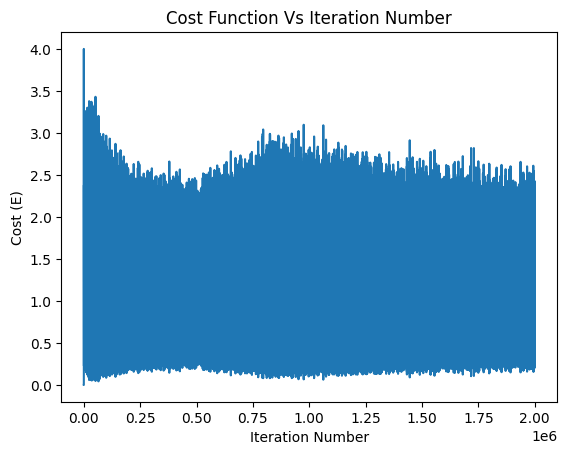

In [ ]:
plt.plot(range(len(weights)), weights)
plt.xlabel('Iteration Number')
plt.ylabel('Cost (E)')
plt.title('Cost Function Vs Iteration Number')
plt.show()

Part  5

In [ ]:
test_predictions = predict(Params_Gradient, X_test)
test_accuracy = np.mean(test_predictions == Y_test)
print("Test Accuracy:", test_accuracy)

[[5.00563786e-01 4.96049410e-01 5.00343115e-01 5.00287566e-01
  5.00465269e-01 5.00553174e-01 3.53997708e-01 4.10826978e-01
  4.88410190e-01 4.67506744e-01 3.13874299e-01 4.98653981e-01
  3.68751056e-02 4.92552931e-01 5.00567754e-01 1.64830568e-01
  0.00000000e+00 1.12648879e-01 6.26698693e-11 3.04077735e-01
  2.86747127e-03 5.00567562e-01 2.88404525e-01 4.97528886e-01
  4.74514326e-01 4.77129531e-01 4.98800329e-01 4.79607761e-01
  5.00221296e-01 5.00201711e-01 2.74063254e-01 5.00567658e-01
  4.96629736e-01 4.81588725e-01 4.97155248e-01 3.12335909e-01
  4.98844743e-01 5.00539781e-01 4.94639672e-01 4.95645183e-01
  4.95810332e-01 4.83911683e-01 4.99541531e-01 4.99762659e-01
  4.78740640e-01 2.23154986e-01 3.61581051e-01 4.51918940e-01
  4.62982219e-01 4.91161462e-01 2.44014465e-01 5.00135792e-01
  1.54052709e-03 5.00439009e-01 4.60711504e-01 5.00349681e-01
  4.88987371e-01 4.19393091e-01 7.76105494e-05 4.91199182e-01
  4.84444280e-01 9.63864544e-11 4.05622077e-01 4.55820488e-01
  3.5172

In [ ]:
print(X_train.shape[1])
total=X_train.shape[1]
Batches_count = total//32
print("Number of Batches:",Batches_count)

1248
Number of Batches: 39


HP-2

In [ ]:
def mini_batch_gradient_descent(X, Y, hidden_layers, learning_rate, num_epochs, batch_size):
    Input_shape = X.shape[0]
    output_shape = Y.shape[0]
    weights = []
    parameters = initial_weights(Input_shape, output_shape, hidden_layers)
    num_batches = len(X.T) // batch_size
    for epoch in range(num_epochs):
        permutation = np.random.permutation(len(X.T))
        X_shuffled = X[:, permutation]
        Y_shuffled = Y[:, permutation]
        for batch in range(num_batches):
            start_idx = batch * batch_size
            end_idx = (batch + 1) * batch_size
            X_batch = X_shuffled[:, start_idx:end_idx]
            Y_batch = Y_shuffled[:, start_idx:end_idx]
            A2, memo = for_prop(X_batch, parameters)
            cost = cal_cost(A2, Y_batch)
            weights.append(cost / batch_size)
            gradients = ba_prop(parameters, memo, X_batch, Y_batch)
            parameters = update_parameters(parameters, gradients, learning_rate)
        if epoch % 100 == 0:
            print(f"Cost after epoch {epoch}: {weights[-1]}")
    return parameters, weights
hidden_layers = 4
learning_rate = 0.01
num_epochs = 2 * 10**6
batch_size = 32
trained_parameters_mini_batch, weights_mini_batch = mini_batch_gradient_descent(X_train, Y_train, hidden_layers, learning_rate, num_epochs, batch_size)
print(weights_mini_batch)


Cost after epoch 0: 1.252183595437247
Cost after epoch 100: 1.1499389502544286
Cost after epoch 200: 0.7560253991849801
Cost after epoch 300: 0.8617264661462767
Cost after epoch 400: 1.1635555543093845
Cost after epoch 500: 1.0127805016375635
Cost after epoch 600: 0.7176576674342234
Cost after epoch 700: 1.0521620340550721
Cost after epoch 800: 1.0462947695253564
Cost after epoch 900: 0.829009921880846
Cost after epoch 1000: 1.2006473371817854
Cost after epoch 1100: 1.0549656297442376
Cost after epoch 1200: 1.1172989252169017
Cost after epoch 1300: 0.705895357806295
Cost after epoch 1400: 0.9773580921883941
Cost after epoch 1500: 0.9074717488235347
Cost after epoch 1600: 0.7992200009805088
Cost after epoch 1700: 0.7807284660923635
Cost after epoch 1800: 0.8991460600014067
Cost after epoch 1900: 1.01524780364287
Cost after epoch 2000: 1.2146867016057876
Cost after epoch 2100: 0.9238499228655143
Cost after epoch 2200: 1.0948366456697447
Cost after epoch 2300: 0.8686108224856052
Cost afte

In [ ]:
#print(weights_mini_batch)
import matplotlib.pyplot as plt
plt.plot(range(len(weights_mini_batch)), weights_mini_batch)
plt.xlabel('Iteration Number')
plt.ylabel('Cost (E)')
plt.title('Cost Function E versus Iteration Number')
plt.show()